In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

<h1>HPG reserve DB from csv</h1>

In [2]:
df = pd.read_csv("../input/hpg_reserve.csv", parse_dates=['visit_datetime', 'reserve_datetime'])

In [3]:
#df.info()
df.dtypes

hpg_store_id                object
visit_datetime      datetime64[ns]
reserve_datetime    datetime64[ns]
reserve_visitors             int64
dtype: object

In [4]:
df.head()

,hpg_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,hpg_c63f6f42e088e50f,2016-01-01 11:00:00,2016-01-01 09:00:00,1
1,hpg_dac72789163a3f47,2016-01-01 13:00:00,2016-01-01 06:00:00,3
2,hpg_c8e24dcf51ca1eb5,2016-01-01 16:00:00,2016-01-01 14:00:00,2
3,hpg_24bb207e5fd49d4a,2016-01-01 17:00:00,2016-01-01 11:00:00,5
4,hpg_25291c542ebb3bc2,2016-01-01 17:00:00,2016-01-01 03:00:00,13


In [5]:
df.describe()

,reserve_visitors
count,2.000320e+06
mean,5.073785e+00
std,5.416172e+00
min,1.000000e+00
25%,2.000000e+00
50%,3.000000e+00
75%,6.000000e+00
max,1.000000e+02


In [6]:
df.isnull().values.any()

False

<h2>hpg_store_id column</h2>

In [7]:
print('The dataset contains info about %s restaurants' % len(df['hpg_store_id'].unique()))

The dataset contains info about 13325 restaurants


In [8]:
df['hpg_store_id'].value_counts()

hpg_2afd5b187409eeb4    1155
hpg_011e799ba201ad2e     822
hpg_9b20c78a9b8179d9     778
hpg_527c60506b80ac72     740
hpg_3f9e56ac6f9435c7     729
hpg_4ca09101fa3a220c     712
hpg_aa65f5cf277f5c1b     709
hpg_530167631513dade     707
hpg_0de000d523008f5c     706
hpg_29550cc7d8a13527     697
hpg_e1980050a6b3cfc7     696
hpg_3fe931c822225cdd     692
hpg_e09b5bfc4466a824     686
hpg_cbaa93169788db8a     685
hpg_7411ea55d6021086     679
hpg_1c65e6289c0b78c6     678
hpg_edcfadc86ee99e14     677
hpg_87769583f14049b2     676
hpg_c3630b10c8b0c89f     674
hpg_35976712b1d926a3     669
hpg_cf6a6cfa63cb148b     655
hpg_e301b8c7a984972f     652
hpg_d105f32ece71d885     645
hpg_0cc19f45942c462f     644
hpg_c0d867af733bd5ec     644
hpg_0fb2b561ddb41d98     642
hpg_14d4ce5b81e686f6     641
hpg_122f093dd3f746a5     639
hpg_053676b196ae1e1e     635
hpg_40aff6385800ebb1     634
                        ... 
hpg_f369f7ddbeb6771e       8
hpg_840f47948aa26e38       8
hpg_239861fac439ac3f       8
hpg_08556f2706

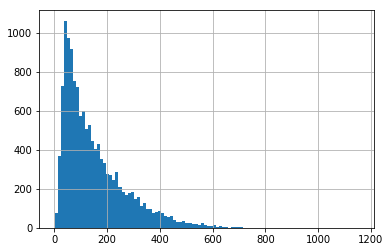

In [9]:
df['hpg_store_id'].value_counts().hist(bins=100)

<h2>visit_datetime column</h2>

In [10]:
print("Min visit date :  %s" %df['visit_datetime'].min())
print("Max visit date :  %s" %df['visit_datetime'].max())
print('\n\n')
print(df['visit_datetime'].describe())

Min visit date :  2016-01-01 11:00:00
Max visit date :  2017-05-31 23:00:00



count                 2000320
unique                   9847
top       2016-12-16 19:00:00
freq                    10528
first     2016-01-01 11:00:00
last      2017-05-31 23:00:00
Name: visit_datetime, dtype: object


<h2>reserve_datetime column</h2>

In [11]:
print("Min reserve date :  %s" %df['reserve_datetime'].min())
print("Max reserve date :  %s" %df['reserve_datetime'].max())
print('\n\n')
print(df['reserve_datetime'].describe())


# Week day name
df['visit_datetime_weekdayname'] = df['visit_datetime'].dt.weekday_name
df['reserve_datetime_weekdayname'] = df['reserve_datetime'].dt.weekday_name

# Month
df['visit_datetime_month'] = df['visit_datetime'].dt.month
df['reserve_datetime_month'] = df['reserve_datetime'].dt.month
print('\n\n')

# Having Column of the hours
# we add new column 'visit_datetime_hour'
df['reserve_datetime_hour'] = df['reserve_datetime'].dt.hour
print("All the hours in reserve datetime:\n%s"% df['reserve_datetime_hour'].unique())
#print(df['visit_datetime_hour'].dtype)
print('\n')

df['visit_datetime_hour'] = df['visit_datetime'].dt.hour
print("All the hours in visit datetime:\n%s"% df['visit_datetime_hour'].unique())
#print(df['visit_datetime_hour'].dtype)
print('\n')


Min reserve date :  2016-01-01 00:00:00
Max reserve date :  2017-04-22 23:00:00



count                 2000320
unique                  11450
top       2016-12-12 21:00:00
freq                      907
first     2016-01-01 00:00:00
last      2017-04-22 23:00:00
Name: reserve_datetime, dtype: object



All the hours in reserve datetime:
[ 9  6 14 11  3 15 17 13 16  7 10 12  0  4 18 19  1 20 21  5 23 22  8  2]


All the hours in visit datetime:
[11 13 16 17 18 19 20 21 22 10 12 14 15 23  0  1  9  7  2  6  4  5  3  8]




<h2>reserve_visitors column</h2>

In [12]:
print(df['reserve_visitors'].describe())
print('\n\n')
print(len(df['reserve_visitors'].unique()))
print('\n\n')
print(df['reserve_visitors'].min())
print(df['reserve_visitors'].max())

count    2.000320e+06
mean     5.073785e+00
std      5.416172e+00
min      1.000000e+00
25%      2.000000e+00
50%      3.000000e+00
75%      6.000000e+00
max      1.000000e+02
Name: reserve_visitors, dtype: float64



99



1
100


In [13]:
df[df['reserve_visitors']==1]


,hpg_store_id,visit_datetime,reserve_datetime,reserve_visitors,visit_datetime_weekdayname,reserve_datetime_weekdayname,visit_datetime_month,reserve_datetime_month,reserve_datetime_hour,visit_datetime_hour
0,hpg_c63f6f42e088e50f,2016-01-01 11:00:00,2016-01-01 09:00:00,1,Friday,Friday,1,1,9,11
938,hpg_3b7d239aac659f53,2016-01-03 12:00:00,2016-01-03 11:00:00,1,Sunday,Sunday,1,1,11,12
1757,hpg_ce524528d5641b0a,2016-01-04 11:00:00,2016-01-01 19:00:00,1,Monday,Friday,1,1,19,11
1789,hpg_e0bdf8d6ea4e1d6c,2016-01-04 12:00:00,2016-01-03 11:00:00,1,Monday,Sunday,1,1,11,12
1885,hpg_c2458e9aaee8d652,2016-01-04 17:00:00,2016-01-01 09:00:00,1,Monday,Friday,1,1,9,17
1909,hpg_f895c9b6dffc1d17,2016-01-04 17:00:00,2016-01-01 16:00:00,1,Monday,Friday,1,1,16,17
2425,hpg_935dba9fe193d6b5,2016-01-04 20:00:00,2016-01-03 21:00:00,1,Monday,Sunday,1,1,21,20
2432,hpg_b676610941368111,2016-01-04 20:00:00,2016-01-03 09:00:00,1,Monday,Sunday,1,1,9,20
2480,hpg_3f4312da9f7018f0,2016-01-05 11:00:00,2016-01-02 01:00:00,1,Tuesday,Saturday,1,1,1,11
2504,hpg_7f3e435f7edd6d5b,2016-01-05 12:00:00,2016-01-03 22:00:00,1,Tuesday,Sunday,1,1,22,12


In [14]:
# The restaurants sorted by overall number of reserve visitors
df.groupby('hpg_store_id')['reserve_visitors'] \
    .agg({"Overall number of reserved seats": "sum"}) \
    .sort_values(by="Overall number of reserved seats", ascending=False)

/home/gali/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  This is separate from the ipykernel package so we can avoid doing imports until


,Overall number of reserved seats
hpg_store_id,
hpg_e3264fffe34160a3,2172
hpg_84fa706f3ffc5ea1,2163
hpg_e5e6b5a501a943bf,2153
hpg_2ac954eae9f3e384,2145
hpg_b4bb8ec87692f580,2141
hpg_6d59cc10bf38cc17,2135
hpg_187ea4694e96df18,2128
hpg_89968cfe381a5f7b,2126
hpg_4ec4204594471ed0,2125


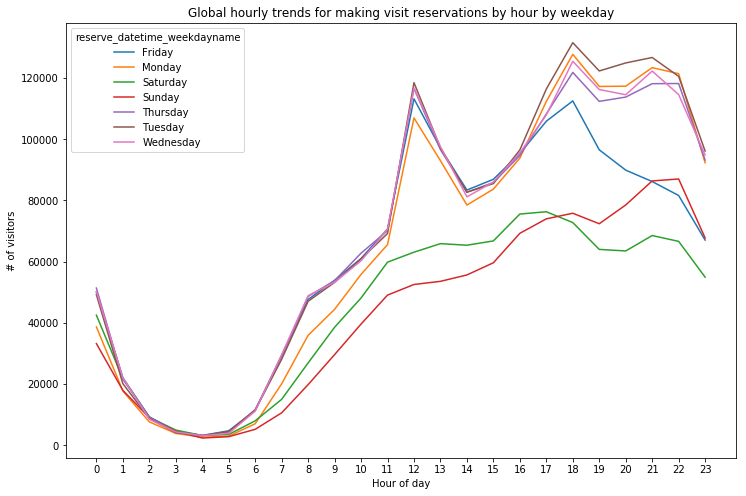

In [15]:
ax = df.pivot_table(index=df['reserve_datetime'].dt.hour, 
                    columns='reserve_datetime_weekdayname', 
                    values='reserve_visitors', 
                    aggfunc='sum').plot(figsize=(12,8), 
                                        title='Global hourly trends for making visit reservations by hour by weekday',
                                        xticks=np.arange(0, 24, 1))
 
ax.set_xlabel("Hour of day")
ax.set_ylabel("# of visitors");

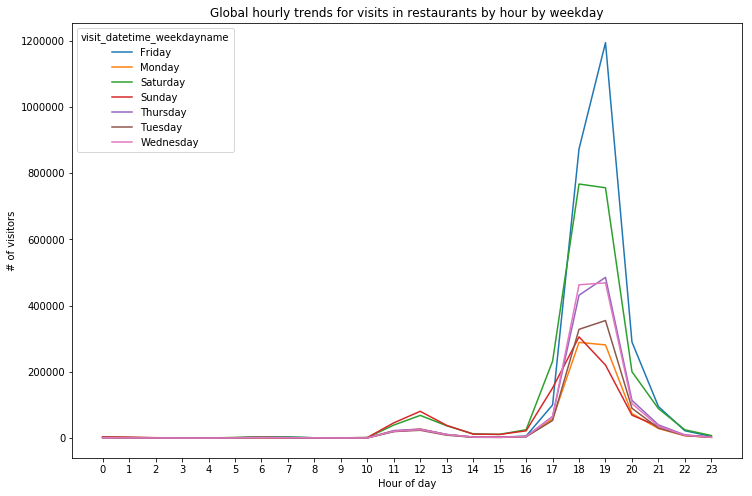

In [16]:
ax = df.pivot_table(index=df['visit_datetime'].dt.hour, 
                    columns='visit_datetime_weekdayname', 
                    values='reserve_visitors', 
                    aggfunc='sum').plot(figsize=(12,8), 
                                        title='Global hourly trends for visits in restaurants by hour by weekday',
                                        xticks=np.arange(0, 24, 1))

ax.set_xlabel("Hour of day")
ax.set_ylabel("# of visitors");

In [17]:
df_visits = df[['visit_datetime', 'reserve_visitors']]

# Set index and delete the column
df_visits.index = df_visits['visit_datetime']
del df_visits['visit_datetime']

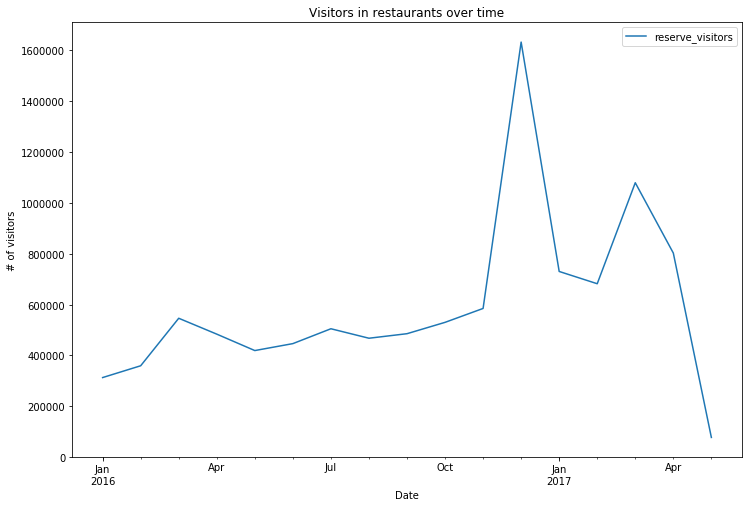

In [18]:
ax = df_visits.resample('M').sum().plot(figsize=(12,8), 
                                        title='Visitors in restaurants over time');
ax.set_xlabel("Date")
ax.set_ylabel("# of visitors");

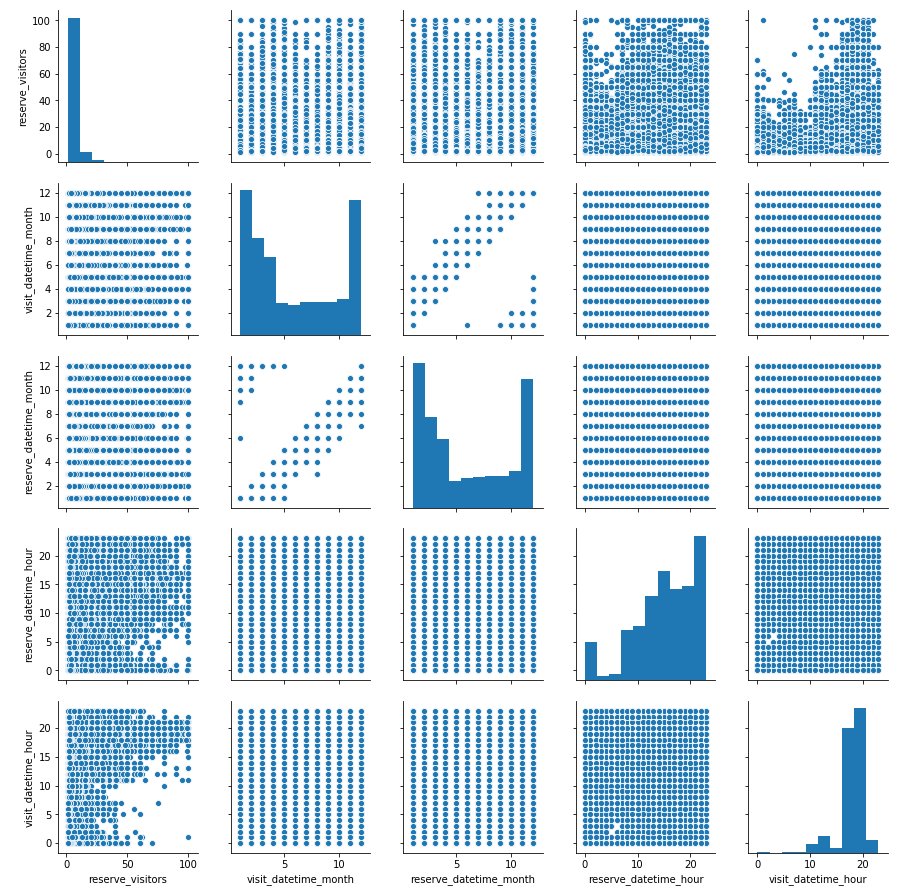

In [19]:
sns.pairplot(df)